## **<span style="color:blue">University of Management & Technology</span>**
### <span>Deep Learning & Neural Networks</span>
### Assignment 3

<table style="width:100%; border-collapse:collapse; margin-top:20px; font-family:Arial, sans-serif; border:1px solid #bbb;">

  <tr>
    <th colspan="2" 
        style="background:#0056b3; color:white; text-align:left; 
               padding:10px; font-size:18px; font-weight:bold; 
               border-bottom:1px solid #bbb;">
      Information
    </th>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold; width:30%;">Student Name:</td>
    <td style="padding:10px;">Syed Shahzil Abbas</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">ID:</td>
    <td style="padding:10px;">23018020020</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">Program:</td>
    <td style="padding:10px;">BSCS Sec A Batch 18 — Semester Fall 25</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">Course Title:</td>
    <td style="padding:10px;">Deep Learning and Neural Networks</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">Resource Person:</td>
    <td style="padding:10px;">Ms Hina Tufail</td>
  </tr>
</table>

**_<spam style="color:blue">About MNIST Dataset</span>_**

In the history of deep learning, the accurate image classification of the MNIST dataset, a collection of 70,000 grayscale images of handwritten digits from 0 to 9, was a major development. While today the problem is considered trivial, doing image classification with MNIST has become a kind of "Hello World" for deep learning.

Here are some of the images included in the MNIST dataset:

## Training and Validation Data and Labels

When working with images for deep learning, I need both the images themselves, usually denoted as `X`, and also, correct labels for these images, usually denoted as `Y`. Furthermore, I need `X` and `Y` values both for *training* the model, and then, a separate set of `X` and `Y` values for *validating* the performance of the model after it has been trained. Therefore, I need 4 segments of data for the MNIST dataset:

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the model's predictions during training
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained
4. `y_valid`: Correct labels for the `x_valid` images, used to evaluate the model's predictions after it has been trained

## Loading the Data Into Memory (with Keras)

There are many ways to perform training but I'm using **Tensorflow** as instructed in the assignment.
**Keras** is considered a sub module of **Tensorflow** now.

In [1]:
from tensorflow.keras.datasets import mnist

With the `mnist` module, I can easily load the MNIST data, already partitioned into images and labels for both training and validation:

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Exploring the MNIST Data

MNIST dataset contains 70,000 grayscale images of handwritten digits. By executing the following cells, I can see that Keras has partitioned 60,000 of these images for training, and 10,000 for validation (after training), and also, that each image itself is a 2D array with the dimensions 28x28:

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_valid.shape

(10000, 28, 28)

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
x_train.min()

0

In [7]:
x_train.max()

255

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Using Matplotlib, I can render one of these grayscale images in the dataset:

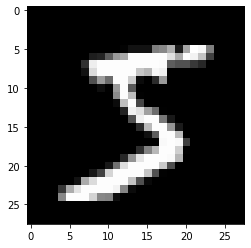

In [9]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In this way I can now see that this is a 28x28 pixel image of a 5. Or is it a 3? The answer is in the `y_train` data, which contains correct labels for the data. Let's take a look:

In [10]:
y_train[0]

5

## Preparing the Data for Training

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks to perform with the data in preparation for training:
1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

To begin, I will use Keras's Sequential model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

Though it's possible for a deep learning model to accept a 2-dimensional image (in our case 28x28 pixels), I'm going to simplify things to start and reshape each image into a single array of 784 continuous pixels (note: 28x28 = 784). This is also called flattening the image.

Here I accomplish this using the helper method `reshape`:

In [11]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

I can confirm that the image data has been reshaped and is now a collection of 1D arrays containing 784 pixel values each:

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizing the Image Data

Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called normalization, and a simple approach I will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [14]:
x_train = x_train / 255
x_valid = x_valid / 255 

I can now see that the values are all floating point values between `0.0` and `1.0`:

In [15]:
x_train.dtype

dtype('float64')

In [16]:
x_train.min()

0.0

In [17]:
x_train.max()

1.0

### Categorical Encoding

As it stands, the labels for the images are integers between 0 and 9. Because these values represent a numerical range, the model might try to draw some conclusions about its performance based on how close to the correct numerical category it guesses.

Therefore, I will perform categorical encoding on the labels. This transformation modifies the data so that each value is a collection of all possible categories, with the actual category set as true.

Rather than use "True" or "False", we could represent the same using binary, either 0 or 1:

This is what categorical encoding is, transforming values which are intended to be understood as categorical labels into a representation that makes their categorical nature explicit to the model. Thus, if we were using these values for training, we would convert...

... which a neural network would have a very difficult time making sense of, instead to:

### Categorically Encoding the Labels

Keras provides a utility to categorically encode values, and here I use it to perform categorical encoding for both the training and validation labels:

In [18]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Here are the first 10 values of the training labels, which I can see have now been categorically encoded:

In [19]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Creating the Model

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several *layers* and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *neurons*. Each [neuron](https://developers.google.com/machine-learning/glossary#neuron) will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image

### Instantiating the Model

To begin, we will use Keras's [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [20]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Creating the Input Layer

Next, I will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, I use Keras's Dense layer class.

In [21]:
from tensorflow.keras.layers import Dense

The `units` argument specifies the number of neurons in the layer. We are going to use `512` which we have chosen from experimentation. Choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset. Try playing around with this value later to see how it affects training and to start developing a sense for what this number means.

We will learn more about activation functions later, but for now, we will use the `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values:

In [22]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### Creating the Hidden Layer

Now we will add an additional densely connected layer. Again, much more will be said about these later, but for now know that these layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [23]:
model.add(Dense(units = 512, activation='relu'))

### Creating the Output Layer

Finally, we will add an output layer. This layer uses the activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class:

In [24]:
model.add(Dense(units = 10, activation='softmax'))

Keras provides the model instance method summary which will print a readable summary of a model:

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Note the number of trainable parameters. Each of these can be adjusted during training and will contribute towards the trained model's guesses.

### Compiling the Model

Again, more details are to follow, but the final step I need to do before I can actually train my model with data is to compile it. Here I specify a loss function which will be used for the model to understand how well it is performing during training. I also specify that I would like to track `accuracy` while the model trains:

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

Now that I have prepared training and validation data, and a model, it's time to train my model with my training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, I use the model's fit method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

Run the cell below to train the model. I will discuss its output after the training completes:

In [27]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1933 - accuracy: 0.9429 - val_loss: 0.1129 - val_accuracy: 0.9675
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0989 - accuracy: 0.9742 - val_loss: 0.1008 - val_accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9799 - val_loss: 0.1260 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9838 - val_loss: 0.1187 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9858 - val_loss: 0.1220 - val_accuracy: 0.9774


### Observing Accuracy

The model does quite well! The accuracy quickly reaches close to 100%, as does the validation accuracy. I now have a model that can be used to accurately detect and classify hand-written images.

The model did quite well! The accuracy quickly reached close to 100%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). We'll explore the process of inference in a later exercise. 